In [4]:
import pandas as pd
import time
import spacy
import numpy as np
from datetime import datetime, timezone
import pytz  
import tzlocal
from dateutil import tz
import re
from nltk import pos_tag
from nltk.corpus import wordnet as wn
from collections import defaultdict
from backports.zoneinfo import ZoneInfo
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec


# stopwords, tokenizer, stemmer
import nltk  
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import RSLPStemmer
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# data visualization
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.express as px
import seaborn as sns



In [5]:
df = pd.read_csv("search_bolsonaro.csv")

In [6]:
df.shape

(100, 7)

In [7]:
df.head()

,Tweet_ID,Tweet_Text,Created_at,Tweet_Geo,User_Name,User_Location,Sentimento
0,1555479941202038784,@NordestePatrio1 @RaquelBlak @jairbolsonaro Se...,2022-08-05 09:04:52+00:00,NaN,Sergio nascimento,NaN,negativo
1,1555479876215390212,se o dia hoje for merda a culpa é literalmente...,2022-08-05 09:04:36+00:00,NaN,edu ☆,ela/dela,negativo
2,1555479834134036480,@LulaOficial @verdadenarede Oh Lula ladrão nós...,2022-08-05 09:04:26+00:00,NaN,Virinha Fonseca,NaN,positivo
3,1555479832812716032,@BrazilFight Não PR BOLSONARO.nao precisa d...,2022-08-05 09:04:26+00:00,NaN,Mary Puletti,"São Paulo, Brasil",positivo
4,1555479830837207050,@soniaforabando @defconlevel4 @CamargoDireita ...,2022-08-05 09:04:25+00:00,NaN,Isabela Ferreira Ribeiro,NaN,positivo


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       100 non-null    int64 
 1   Tweet_Text     100 non-null    object
 2   Created_at     100 non-null    object
 3   Tweet_Geo      5 non-null      object
 4   User_Name      100 non-null    object
 5   User_Location  56 non-null     object
 6   Sentimento     100 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


In [9]:
for value in df['Tweet_Geo']:
    if not(value=='nan'):
        print (value)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
{'place_id': '59373f0a295160e4'}
nan
nan
nan
nan
nan
nan
nan
nan
nan
{'place_id': '23d81de6fe7594cb'}
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
{'place_id': 'd9d978b087a92583'}
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
{'place_id': 'ced0519aaf879b2a'}
nan
nan
nan
nan
nan
{'place_id': 'ad8a3318a4317a03'}
nan
nan
nan
nan
nan
nan
nan
nan


In [10]:
#Split after delimiters

# delimiters = [',', '/', ':','|', '_', '-']
# column_0
# def split_columns(delimiter, column):
#     column = (df['User_Location'].str.split(delimiter, n=1, expand=True))[0]
#     #column_1 =((df['User_Location'].str.split(delimiter, n=1, expand=True))[1])

In [11]:
# for delimiter in delimiters:
#     split_columns(delimiter, column_0)
    
    

In [14]:
df['User_city']= df['User_Location'].str.split(',',n=1, expand=True)[0]

In [15]:
df['User_state']= df['User_Location'].str.split(',',n=1, expand=True)[1]

In [17]:
df['User_city'].value_counts()

Brasil                          9
Cloud                           8
São Paulo                       7
Goiânia                         3
ela/dela                        1
Portugal                        1
Salvador                        1
Belo Horizonte                  1
Mato Grosso do Sul              1
São João de Meriti              1
📩 sugestões na dm.              1
São Carlos                      1
RJ                              1
Ipojuca - PE                    1
Massachusetts                   1
São José dos Campos             1
Blumenau                        1
Rio Grande do Norte             1
São Luís                        1
São José                        1
Sinop                           1
Nova Friburgo                   1
South Africa                    1
Iguatu - Ceará                  1
Lahaina - Maui                  1
Florianópolis                   1
Ile-de-France                   1
Ceará                           1
Fortaleza                       1
Trem-fantasma 

In [18]:
df.head()

,Tweet_ID,Tweet_Text,Created_at,Tweet_Geo,User_Name,User_Location,Sentimento,User_city,User_state
0,1555479941202038784,@NordestePatrio1 @RaquelBlak @jairbolsonaro Se...,2022-08-05 09:04:52+00:00,NaN,Sergio nascimento,NaN,negativo,NaN,NaN
1,1555479876215390212,se o dia hoje for merda a culpa é literalmente...,2022-08-05 09:04:36+00:00,NaN,edu ☆,ela/dela,negativo,ela/dela,None
2,1555479834134036480,@LulaOficial @verdadenarede Oh Lula ladrão nós...,2022-08-05 09:04:26+00:00,NaN,Virinha Fonseca,NaN,positivo,NaN,NaN
3,1555479832812716032,@BrazilFight Não PR BOLSONARO.nao precisa d...,2022-08-05 09:04:26+00:00,NaN,Mary Puletti,"São Paulo, Brasil",positivo,São Paulo,Brasil
4,1555479830837207050,@soniaforabando @defconlevel4 @CamargoDireita ...,2022-08-05 09:04:25+00:00,NaN,Isabela Ferreira Ribeiro,NaN,positivo,NaN,NaN


In [161]:
nlp = spacy.load('pt_core_news_lg')
def preprocess(df):
    stop_words = stopwords.words('portuguese')
    new_stopwords= ['q','pro', 'pra','tar','ter', 'pq' ]
    stop_words.extend(new_stopwords)

    df['Tweet_Text'].dropna(inplace=True)

    #Remove nome de usuários (está diminuindo a precisão)
    df['Tweet_Text'] = [re.sub('@[^\s]+','', entry) for entry in df['Tweet_Text']]

    # Remove @RT de retweets
    df['Tweet_Text'] = [re.sub(r'^RT[\s]+', '', entry) for entry in df['Tweet_Text']]

    # Remove hiperlinks
    df['Tweet_Text'] = [re.sub(r'https?:\/\/.*[\r\n]*', '', entry) for entry in df['Tweet_Text']]
    
    #Lemetizacao
    df["Tweet_Text"] = df['Tweet_Text'].apply(lambda x: " ".join([y.lemma_ for y in nlp(x)]))
    
    # Padroniza todo o texto em caixa baixa (letras minúsculas)
    df['Tweet_Text'] = [entry.lower() for entry in df['Tweet_Text']]
    
    #Remover stopwords
    df['Tweet_Text'] = df['Tweet_Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words) and word.isalpha()]))
    
    
    #Tokenização: Cada tweet é dividido em um array de palavras
    df['Tweet_Text']= [word_tokenize(entry) for entry in df['Tweet_Text']]
    
    

    #Remove Z format
    date_column = []
    for datez in df['Created_at']:
        datez= (datez.split("+", 1))[0]
        date_column.append(datez)
    df['Created_at'] = date_column
    
    #convert timezone

    from_zone = tz.gettz('UTC')
    to_zone = tz.gettz("America/Sao_Paulo")
    local = []
    for date in df['Created_at']:
        date = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
        date = date.replace(tzinfo=from_zone)
        # Convert time zone
        date = date.astimezone(to_zone)
        local.append(date)

    df['Created_at'] = local
    
    #separate column date to date and time
    df['Date_Created'] = pd.to_datetime(df['Created_at']).dt.date
    df['Time_Created'] = pd.to_datetime(df['Created_at']).dt.time
    
 

In [20]:
preprocess(df)

In [21]:
#transformar em array de strings
df['Text_Final']= [str(item) for item in df['Tweet_Text']]

In [22]:
df.head()

,Tweet_ID,Tweet_Text,Created_at,Tweet_Geo,User_Name,User_Location,Sentimento,User_city,User_state,Date_Created,Time_Created,Text_Final
0,1555479941202038784,"[poste, dar, pau, bolsonaro, imaginar, original]",2022-08-05 06:04:52-03:00,NaN,Sergio nascimento,NaN,negativo,NaN,NaN,2022-08-05,06:04:52,"['poste', 'dar', 'pau', 'bolsonaro', 'imaginar..."
1,1555479876215390212,"[dia, hoje, merda, culpa, literalmente, bolson...",2022-08-05 06:04:36-03:00,NaN,edu ☆,ela/dela,negativo,ela/dela,None,2022-08-05,06:04:36,"['dia', 'hoje', 'merda', 'culpa', 'literalment..."
2,1555479834134036480,"[oh, lula, ladrão, amar, bolsonaro, mitoooo, i...",2022-08-05 06:04:26-03:00,NaN,Virinha Fonseca,NaN,positivo,NaN,NaN,2022-08-05,06:04:26,"['oh', 'lula', 'ladrão', 'amar', 'bolsonaro', ..."
3,1555479832812716032,"[pr, precisar, ajuda]",2022-08-05 06:04:26-03:00,NaN,Mary Puletti,"São Paulo, Brasil",positivo,São Paulo,Brasil,2022-08-05,06:04:26,"['pr', 'precisar', 'ajuda']"
4,1555479830837207050,"[olha, fake, news, bolsonaro, apoiar, pilar, f...",2022-08-05 06:04:25-03:00,NaN,Isabela Ferreira Ribeiro,NaN,positivo,NaN,NaN,2022-08-05,06:04:25,"['olha', 'fake', 'news', 'bolsonaro', 'apoiar'..."


In [23]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['Text_Final'],df['Sentimento'],test_size=0.3)

Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

#Padrões TF-IDF
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df['Text_Final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

#print(Tfidf_vect.vocabulary_)

#print(Train_X_Tfidf)

In [24]:
# ajustar o conjunto de dados de treinamento no classificador NB
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# prever os rótulos no conjunto de dados de validação
predictions_NB = Naive.predict(Test_X_Tfidf)

#imprimir na tela a acurácia, f-measure, precisão e recall
print("Naive Bayes Accuracy: ",accuracy_score(predictions_NB, Test_Y)*100)
print("Naive Bayes F-Measure: ",f1_score(predictions_NB, Test_Y, average="macro")*100)
print("Naive Bayes Precision: ",precision_score(predictions_NB, Test_Y, average="macro")*100)
print("Naive Bayes Recall: ",recall_score(predictions_NB, Test_Y, average="macro")*100)

Naive Bayes Accuracy:  50.0
Naive Bayes F-Measure:  36.868686868686865
Naive Bayes Precision:  46.15384615384615
Naive Bayes Recall:  38.302277432712216


/Users/maiaracandido/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
# Classificador SVM
# ajustar o conjunto de dados de treinamento no classificador SVM
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# prever os rótulos no conjunto de dados de validação
predictions_SVM = SVM.predict(Test_X_Tfidf)
#imprimir na tela a acurácia, f-measure, precisão e recall
print("SVM Accuracy: ",accuracy_score(predictions_SVM, Test_Y)*100)
print("SVM F-Measure: ",f1_score(predictions_SVM, Test_Y, average="macro")*100)
print("SVM Precision: ",precision_score(predictions_SVM, Test_Y, average="macro")*100)
print("SVM Recall: ",recall_score(predictions_SVM, Test_Y, average="macro")*100)

SVM Accuracy:  46.666666666666664
SVM F-Measure:  35.41666666666667
SVM Precision:  42.820512820512825
SVM Recall:  37.44588744588744


In [26]:
#Implementing word2vec
# Skip-gram model (sg = 1)
size = 1000
window = 3
min_count = 1
workers = 3
sg = 1

start_time = time.time()
stemmed_tokens = pd.Series(df['Text_Final']).values
# Train the Word2Vec Model
w2v_model = Word2Vec(stemmed_tokens, min_count = min_count, vector_size = size, workers = workers, window = window, sg = sg)

# To make the model memory efficient
w2v_model.init_sims(replace=True)
print("Time taken to train word2vec model: " + str(time.time() - start_time))
model_name = "model_w2vec_Bolsonaro"
w2v_model.save(model_name)

Time taken to train word2vec model: 0.10400891304016113


<ipython-input-26-2e2677496df9>:15: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model.init_sims(replace=True)


In [27]:
# Load the model from the model file
sg_w2v_model = Word2Vec.load('model_w2vec_Bolsonaro')
# Unique ID of the word
print("Index of the word 'action':")
#print(sg_w2v_model.wv.vocab["action"].index)
# Total number of the words 
#print(len(sg_w2v_model.wv.vocab))
# Print the size of the word2vec vector for one word
#print("Length of the vector generated for a word")
#print(len(sg_w2v_model['action']))
# Get the mean for the vectors for an example review
print("Print the length after taking average of all word vectors in a sentence:")
print(np.mean([sg_w2v_model.wv[token] for token in df.Text_Final[0]], axis=0))


Index of the word 'action':
Print the length after taking average of all word vectors in a sentence:
[ 6.20703511e-02 -9.01158061e-03  1.62606854e-02  3.03352289e-02
 -5.22649707e-03 -2.78162844e-02  9.64285713e-03  2.65165064e-02
 -2.87822224e-02  6.35299552e-03  1.43507617e-02 -1.66629460e-02
 -2.47251932e-02  2.83608958e-02  4.69394680e-03 -9.91221704e-03
 -1.39916604e-02 -2.36973781e-02  4.91776457e-03 -2.81328298e-02
  2.22473666e-02 -5.28137945e-03 -1.45185404e-02 -1.82602135e-03
  4.02197428e-03 -9.16694105e-03  3.08120903e-02 -4.31073941e-02
 -4.83133048e-02  2.15704720e-02  1.87644400e-02 -1.06651671e-02
  4.31478061e-02  2.54976060e-02  2.50593331e-02  1.44864898e-02
  5.18428423e-02  2.99089914e-03 -9.06136725e-03 -3.47128436e-02
 -4.07613954e-03  4.90417238e-03 -4.48562838e-02  2.25652289e-02
 -5.86044677e-02 -4.75015529e-02 -3.03927045e-02  4.19912897e-02
 -2.60295290e-02  4.84266803e-02  6.47621276e-03 -1.86641272e-02
  1.24351922e-02 -2.84963045e-02  6.09195679e-02  2.92

In [28]:
# Function to average all word vectors in a paragraph
def featureVecMethod(words, model, num_features):
    # Pre-initialising empty numpy array for speed
    featureVec = np.zeros(num_features,dtype="float32")
    nwords = 0
    
    #Converting Index2Word which is a list to a set for better speed in the execution.
    index2word_set = set(model.wv.index_to_key)
    
    for word in  words:
        if word in index2word_set:
            nwords = nwords + 1
            featureVec = np.add(featureVec,model.wv[word])
    
    # Dividing the result by number of words to get average
    featureVec = np.divide(featureVec, nwords)
    return featureVec

In [29]:
# Function for calculating the average feature vector
def getAvgFeatureVecs(reviews, model, num_features):
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        # Printing a status message every 1000th review
        if counter%1000 == 0:
            print("Review %d of %d"%(counter,len(reviews)))
            
        reviewFeatureVecs[counter] = featureVecMethod(review, model, num_features)
        counter = counter+1
        
    return reviewFeatureVecs

In [30]:
# Calculating average feature vector for training set
trainDataVecs = getAvgFeatureVecs(Train_X, sg_w2v_model, size)

Review 0 of 70


In [31]:
# Calculating average feature vactors for test set     
    
testDataVecs = getAvgFeatureVecs(Test_X, sg_w2v_model, size)

Review 0 of 30


In [32]:
# Classificador SVM with word2vec
# ajustar o conjunto de dados de treinamento no classificador SVM
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(trainDataVecs,Train_Y)
# prever os rótulos no conjunto de dados de validação
predictions_SVM = SVM.predict(testDataVecs)
#imprimir na tela a acurácia, f-measure, precisão e recall
print("SVM Accuracy: ",accuracy_score(predictions_SVM, Test_Y)*100)
print("SVM F-Measure: ",f1_score(predictions_SVM, Test_Y, average="macro")*100)
print("SVM Precision: ",precision_score(predictions_SVM, Test_Y, average="macro")*100)
print("SVM Recall: ",recall_score(predictions_SVM, Test_Y, average="macro")*100)

SVM Accuracy:  33.33333333333333
SVM F-Measure:  16.666666666666664
SVM Precision:  33.33333333333333
SVM Recall:  11.11111111111111


/Users/maiaracandido/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
# Fitting a random forest classifier to the training data
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100)
    
print("Fitting random forest to training data....")    
forest = forest.fit(trainDataVecs, Train_Y)

# prever os rótulos no conjunto de dados de validação
result = forest.predict(testDataVecs)
#imprimir na tela a acurácia, f-measure, precisão e recall
print("Accuracy: ",accuracy_score(result, Test_Y)*100)
print("F-Measure: ",f1_score(result, Test_Y, average="macro")*100)
print("Precision: ",precision_score(result, Test_Y, average="macro")*100)
print("Recall: ",recall_score(result, Test_Y, average="macro")*100)

    

Fitting random forest to training data....
Accuracy:  46.666666666666664
F-Measure:  40.5918642760748
Precision:  45.01831501831502
Recall:  44.44444444444444


Model SVM

In [162]:
#Read data
#preprocess data
df_b= pd.read_csv("search_bolsonaro -is:retweet lang:pt.csv")

preprocess(df_b)


In [105]:
df_b['Text_Final']= [str(item) for item in df_b['Tweet_Text']]

In [106]:
df_b.head()

,Tweet_ID,Tweet_Text,Created_at,Tweet_Geo,User_Name,User_Location,Date_Created,Time_Created,Text_Final
0,1558402223272517632,"[lula, bolsonaro, coisa, corrupto, incompetent...",2022-08-13 07:36:58-03:00,NaN,Arthur J. F. Braga,NaN,2022-08-13,07:36:58,"['lula', 'bolsonaro', 'coisa', 'corrupto', 'in..."
1,1558402221531959296,"[bolsonaro, manifestar, sobre, fake, news, ter...",2022-08-13 07:36:57-03:00,NaN,Jacinto Sorato (Zorat),"Santa Fé do Sul, Brasil",2022-08-13,07:36:57,"['bolsonaro', 'manifestar', 'sobre', 'fake', '..."
2,1558402219875115008,"[jornalista, dar, notícia, dizer, bolsonaro, r...",2022-08-13 07:36:57-03:00,NaN,Cristina Oliveira,Florianópolis,2022-08-13,07:36:57,"['jornalista', 'dar', 'notícia', 'dizer', 'bol..."
3,1558402198731689991,"[acreditar, fake, news, bolsonaro, esposa, alm...",2022-08-13 07:36:52-03:00,NaN,camila,NaN,2022-08-13,07:36:52,"['acreditar', 'fake', 'news', 'bolsonaro', 'es..."
4,1558402180436172800,"[bom, bolsonaro, lula, porquê]",2022-08-13 07:36:48-03:00,NaN,Akemi,NaN,2022-08-13,07:36:48,"['bom', 'bolsonaro', 'lula', 'porquê']"


In [107]:
Test_X_B = Tfidf_vect.transform(df_b['Text_Final'])

# ajustar o conjunto de dados de treinamento no classificador NB
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# prever os rótulos no conjunto de dados de validação
predictions_NB = Naive.predict(Test_X_Tfidf)
predictions_NBTest = Naive.predict(Test_X_B)
Test_YRecover = Encoder.inverse_transform(predictions_NBTest)
#print(Test_YRecover)

# Classificador SVM
# ajustar o conjunto de dados de treinamento no classificador SVM
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# prever os rótulos no conjunto de dados de validação
predictions_SVM = SVM.predict(Test_X_B )
predictions = SVM.predict(Test_X_B )
predictions_recovered = Encoder.inverse_transform(predictions)
df_b['predict'] = predictions_recovered 

print (df_b['predict'].value_counts())

positivo    782633
negativo    194840
neutro       89961
Name: predict, dtype: int64


In [108]:
# Overall sentiment breakdown

bolsonaro_positive = len(df.loc[df_b['predict']=='positivo'])
bolsonaro_neutral = len(df.loc[df_b['predict']=='neutro'])
bolsonaro_negative = len(df.loc[df_b['predict']=='negativo'])


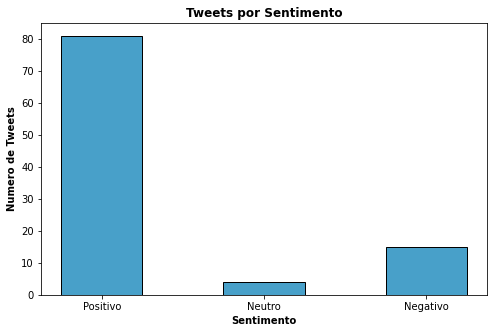

In [134]:
# Graphing the number of  tweets by sentiment
data_t = {'Positivo':bolsonaro_positive,'Neutro':bolsonaro_neutral,'Negativo':bolsonaro_negative}
sentiment_t = data_t.keys()
num_tweets_t = data_t.values() 

plt.figure(figsize = (8, 5)) 

plt.bar(sentiment_t, num_tweets_t, color ='#48A0C9', width = 0.5, edgecolor='black',) 

plt.xlabel("Sentimento", fontweight ='bold') 
plt.ylabel("Numero de Tweets", fontweight ='bold') 
plt.title("Tweets por Sentimento", fontweight ='bold') 
plt.show() 

In [110]:
# Function to return a string of all words in all tweets

def get_all_tweets(df,by_sentiment=False,sentiment="positivo"):
    
    # Combine all words in tweets into a string
    if by_sentiment:
        if sentiment == "positivo":
            words = ' '.join((df.loc[df['predict']=='positivo'])['Tweet_Text'].apply(lambda x: ' '.join(x)))
        elif sentiment == "neutro":
            words = ' '.join((df.loc[df['predict']=='neutro'])['Tweet_Text'].apply(lambda x: ' '.join(x)))
        else:
            words = ' '.join((df.loc[df['predict']=='negativo'])['Tweet_Text'].apply(lambda x: ' '.join(x)))
    else:
        words = ' '.join(df['Tweet_Text'].apply(lambda x: ' '.join(x)))
        
    return words

In [111]:
# Create word strings
words = get_all_tweets(df_b)
words_pos = get_all_tweets(df_b,True,"positivo")
words_neu = get_all_tweets(df_b,True,"neutro")
words_neg= get_all_tweets(df_b,True,"negativo")



In [112]:
#funcao retorna tokens palavras
def stringToList(string):
    listRes = list(string.split(" "))
    return listRes

In [113]:
tokens = stringToList(words)
tokens_pos = stringToList(words_pos)
tokens_neu = stringToList(words_neu)
tokens_neg = stringToList(words_neg)    

In [114]:
# Function to plot most frquent words
def plot_word_freq(tokens,sentiment,name,color):
    fdist = FreqDist(tokens)
    fdist_df = pd.DataFrame(fdist.most_common(10), columns = ["Palavra","Frequência"])
    fig = px.bar(fdist_df, x="Palavra", y="Frequência",
                 title="<b>Palavras mais frequentes em </b>" + "<b>Tweets </b>" + " " + sentiment + " " + name )
    fig.update_traces(marker=dict(color=color),selector=dict(type="bar"),
                      marker_line_color='black', marker_line_width=1.5, opacity=0.6)
    fig.show()


In [132]:
plot_word_freq(tokens,"<b>Total</b>","<b>Bolsonaro</b>","red")

In [117]:
plot_word_freq(tokens_pos,"<b>Positivos</b>","<b>Bolsonaro</b>","red")

In [118]:
plot_word_freq(tokens_neg,"<b>Negativos</b>","<b>Bolsonaro</b>","red")

In [119]:
plot_word_freq(tokens_neu,"<b>Neutros</b>","<b>Bolsonaro</b>","red")

In [148]:
# Function to generate word cloud
def create_wordcloud(words):
    
    # create wordcloud
    wordcloud = WordCloud(max_font_size=256, max_words=100, 
                          background_color="white",
                          collocations=False, 
                          width=2000, height=1000).generate(words)

    # display the generated image
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

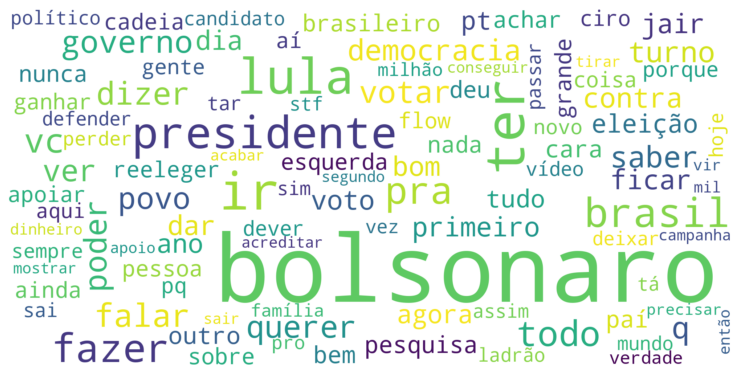

In [149]:
create_wordcloud(words)

In [122]:
#values= df_b.groupby(['User_city', 'predict'])['predict'].count()

In [123]:
#Separar valores data

def encode_dates(df, column):
    df = df.copy()
    df[column] = pd.to_datetime(df[column], format='%Y-%m-%d')
    df[column + '_year'] = df[column].apply(lambda x: x.year)
    df[column + '_month'] = df[column].apply(lambda x: x.month)
    df[column + '_day'] = df[column].apply(lambda x: x.day)
     df[column + '_day'] = df[column].apply(lambda x: x.)
    df = df.drop(column, axis=1)
    return df


In [124]:
df_b= encode_dates(df_b, column='Date_Created')

In [125]:
df_b['User_state']= df_b['User_Location'].str.split(',',n=1, expand=True)[1]

In [126]:
df_b['User_city']= df_b['User_Location'].str.split(',',n=1, expand=True)[0]

In [128]:
df_b.head()

,Tweet_ID,Tweet_Text,Created_at,Tweet_Geo,User_Name,User_Location,Time_Created,Text_Final,predict,Date_Created_year,Date_Created_month,Date_Created_day,User_state,User_city
0,1558402223272517632,"[lula, bolsonaro, coisa, corrupto, incompetent...",2022-08-13 07:36:58-03:00,NaN,Arthur J. F. Braga,NaN,07:36:58,"['lula', 'bolsonaro', 'coisa', 'corrupto', 'in...",positivo,2022,8,13,NaN,NaN
1,1558402221531959296,"[bolsonaro, manifestar, sobre, fake, news, ter...",2022-08-13 07:36:57-03:00,NaN,Jacinto Sorato (Zorat),"Santa Fé do Sul, Brasil",07:36:57,"['bolsonaro', 'manifestar', 'sobre', 'fake', '...",positivo,2022,8,13,Brasil,Santa Fé do Sul
2,1558402219875115008,"[jornalista, dar, notícia, dizer, bolsonaro, r...",2022-08-13 07:36:57-03:00,NaN,Cristina Oliveira,Florianópolis,07:36:57,"['jornalista', 'dar', 'notícia', 'dizer', 'bol...",neutro,2022,8,13,None,Florianópolis
3,1558402198731689991,"[acreditar, fake, news, bolsonaro, esposa, alm...",2022-08-13 07:36:52-03:00,NaN,camila,NaN,07:36:52,"['acreditar', 'fake', 'news', 'bolsonaro', 'es...",positivo,2022,8,13,NaN,NaN
4,1558402180436172800,"[bom, bolsonaro, lula, porquê]",2022-08-13 07:36:48-03:00,NaN,Akemi,NaN,07:36:48,"['bom', 'bolsonaro', 'lula', 'porquê']",positivo,2022,8,13,NaN,NaN


In [129]:
Tweets_d= df_b.groupby(['Created_at', 'predict']).count().reset_index()

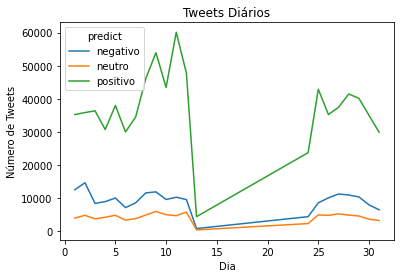

In [130]:
plot1= sns.lineplot(x = "Created_at", y = 'Tweet_ID', hue='predict', data = Tweets_d)
plot1.set(xlabel='Dia', ylabel='Número de Tweets')
plot1. set_title('Tweets Diários')
plt.show()


In [97]:
Tweets_l= df_b.groupby(['User_state', 'predict']).count().reset_index()